/tmp/ipykernel_13673/1027707659.py:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  for chunk in pd.read_csv(


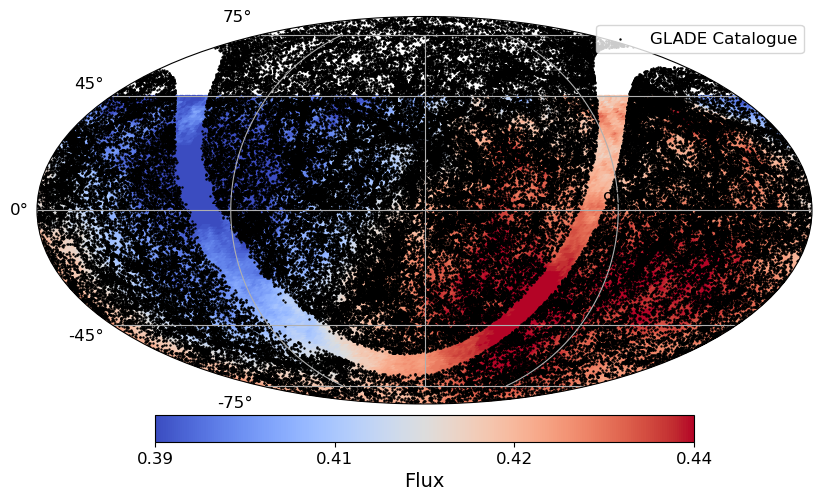

In [7]:
"""
Plot Auger data and GLADE catalog sources on a skymap.
"""
def load_flux_data(flux_file):
    """Load flux catalog."""
    flux_cat = np.loadtxt(flux_file)
    flux_dec, flux_ra, flux_val = flux_cat[:, 0], flux_cat[:, 1], flux_cat[:, 2]
    return flux_ra, flux_dec, flux_val
def read_GLADE(cols_to_use, cz_min, filename, dL_max=200):
    """Read and filter GLADE catalog."""
    from get_masks import get_milkyway_mask
    import pandas as pd
    
    c = 299792.458
    chunksize = 200_000
    
    with open(filename, 'r') as f:
        header = f.readline().lstrip('#').split()
    
    filtered_chunks = []
    
    for chunk in pd.read_csv(
            filename,
            delim_whitespace=True,
            names=header,
            usecols=cols_to_use,
            skiprows=1,
            chunksize=chunksize):
        
        chunk = chunk[chunk["dist_flag"] != 0]
        chunk["cz"] = c * chunk["z_cmb"]
        chunk = chunk[(chunk["cz"] > cz_min) & (chunk["d_L"] < dL_max)]
        chunk["M_K"] = chunk["K"] - 5 * np.log10(chunk["d_L"]) - 25
        mask = np.isfinite(chunk["M_K"]) & np.isfinite(chunk["d_L"]) & \
               np.isfinite(chunk["RA"]) & np.isfinite(chunk["Dec"])
        filtered_chunks.append(chunk.loc[mask])
    
    df = pd.concat(filtered_chunks, ignore_index=True)
    df["M_K"] = df["K"] - 5 * np.log10(df["d_L"]) - 25
    
    # Apply Milky Way mask and dec cut
    df = df.iloc[get_milkyway_mask(df["RA"].values, df["Dec"].values)]
    #df = df[df['Dec'] < Config.MAX_DEC]
    
    return df

import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

# Load galaxies
cols = ["GLADE_no", "RA", "Dec", "z_cmb", "K", "d_L", "dist_flag"]
gxs = read_GLADE(cols, cz_min=0., filename="../data/GLADE_zhelio_lt0.1_dL_lt300.txt")

# Load flux data
flux_ra, flux_dec, flux_val = load_flux_data("../data/Auger/flux_a8_lb.dat")

# Create skymap
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw={'projection': 'mollweide'})
ax.grid(True)

plt.rcParams.update({
'font.size': 14,          # default text size
'axes.labelsize': 14,     # x/y label
'axes.titlesize': 16,     # plot titles
'xtick.labelsize': 12,    # x tick labels
'ytick.labelsize': 12,    # y tick labels
'legend.fontsize': 12     # legend text
})

# Set axis ticks
xticks_deg = [270, 180, 90]
xticks_rad = -np.radians(xticks_deg) + np.pi
ax.set_xticks(xticks_rad)
ax.set_xticklabels([f"{d}°" for d in xticks_deg])

yticks_deg = [-75, -45, 0, 45, 75]
yticks_rad = np.radians(yticks_deg)
ax.set_yticks(yticks_rad)
ax.set_yticklabels([f"{d}°" for d in yticks_deg])

# Plot flux background
p5, p95 = np.percentile(flux_val, [5, 95])
norm_flux = mcolors.Normalize(vmin=p5, vmax=p95)
sc = ax.scatter(
    np.deg2rad(-flux_ra + 180.0), 
    np.deg2rad(flux_dec),
    c=flux_val, 
    s=20, 
    cmap='coolwarm',
    norm=norm_flux, 
    edgecolor='none', 
    alpha=1
)
cbar_flux = plt.colorbar(sc, ax=ax, orientation='horizontal',
                        pad=0.02, fraction=0.05)
cbar_flux.set_label("Flux")
cbar_flux.ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar_flux.set_ticks(
    np.linspace(norm_flux.vmin, norm_flux.vmax, 4)
)

# Plot GLADE galaxies
ax.scatter(
    np.deg2rad(-gxs["RA"].values + 180.0), 
    np.deg2rad(gxs["Dec"].values),
    s=.5, 
    c='black', 
    alpha=1, 
    label='GLADE Catalogue'
)

#plt.title('Auger Flux Data and GLADE Catalog Sources')
plt.legend(loc='upper right')
plt.show()



/tmp/ipykernel_13673/1575233762.py:32: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  for chunk in pd.read_csv(


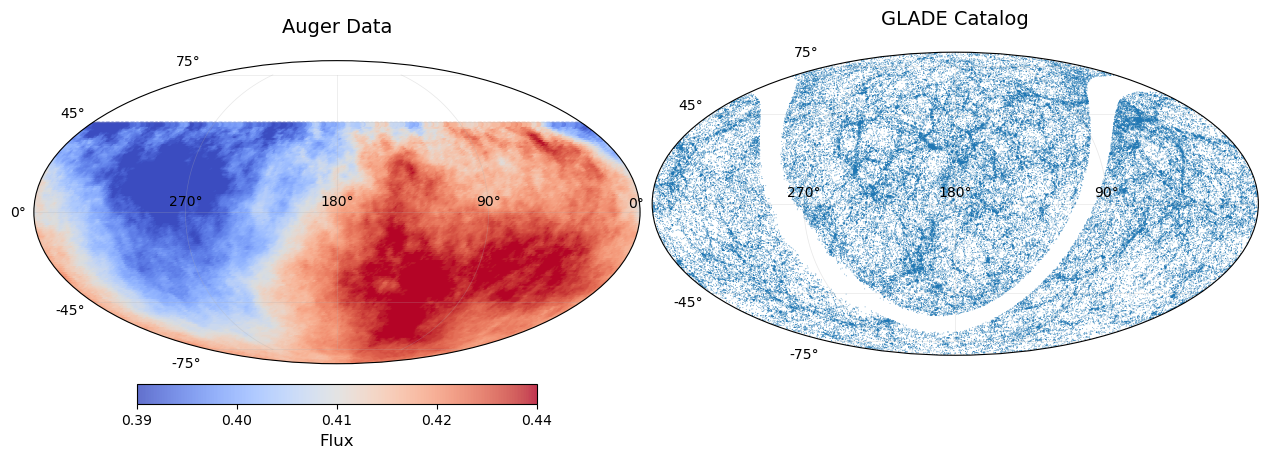

In [38]:
"""
Plot Auger data and GLADE catalog sources on separate 2x1 skymaps.
"""
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import ascii
from astropy.visualization import astropy_mpl_style
import matplotlib.colors as mcolors
from matplotlib.ticker import FormatStrFormatter

def load_flux_data(flux_file):
    """Load flux catalog."""
    flux_cat = np.loadtxt(flux_file)
    flux_dec, flux_ra, flux_val = flux_cat[:, 0], flux_cat[:, 1], flux_cat[:, 2]
    return flux_ra, flux_dec, flux_val

def read_GLADE(cols_to_use, cz_min, filename, dL_max=200):
    """Read and filter GLADE catalog."""
    from get_masks import get_milkyway_mask
    import pandas as pd
    
    c = 299792.458
    chunksize = 200_000
    
    with open(filename, 'r') as f:
        header = f.readline().lstrip('#').split()
    
    filtered_chunks = []
    
    for chunk in pd.read_csv(
            filename,
            delim_whitespace=True,
            names=header,
            usecols=cols_to_use,
            skiprows=1,
            chunksize=chunksize):
        
        chunk = chunk[chunk["dist_flag"] != 0]
        chunk["cz"] = c * chunk["z_cmb"]
        chunk = chunk[(chunk["cz"] > cz_min) & (chunk["d_L"] < dL_max)]
        chunk["M_K"] = chunk["K"] - 5 * np.log10(chunk["d_L"]) - 25
        mask = np.isfinite(chunk["M_K"]) & np.isfinite(chunk["d_L"]) & \
               np.isfinite(chunk["RA"]) & np.isfinite(chunk["Dec"])
        filtered_chunks.append(chunk.loc[mask])
    
    df = pd.concat(filtered_chunks, ignore_index=True)
    df["M_K"] = df["K"] - 5 * np.log10(df["d_L"]) - 25
    
    # Apply Milky Way mask and dec cut
    df = df.iloc[get_milkyway_mask(df["RA"].values, df["Dec"].values)]
    #df = df[df['Dec'] < Config.MAX_DEC]
    
    return df

# Load galaxies
cols = ["GLADE_no", "RA", "Dec", "z_cmb", "K", "d_L", "dist_flag"]
gxs = read_GLADE(cols, cz_min=0., filename="../data/GLADE_zhelio_lt0.1_dL_lt300.txt")

# Load flux data
flux_ra, flux_dec, flux_val = load_flux_data("../data/Auger/flux_a8_lb.dat")

# Set global font sizes
plt.rcParams.update({
    'font.size': 12,
    'axes.labelsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 11
})

# Create a 1x2 subplot layout with Mollweide projection
fig, axes = plt.subplots(1, 2, figsize=(15.8, 5), 
                         subplot_kw={'projection': 'mollweide'})
fig.subplots_adjust(wspace=0.02, top=0.9, bottom=0.1)

# Common settings for both plots
for ax in axes:
    ax.grid(True, alpha=0.3, linewidth=0.5)
    
    # Set axis ticks
    xticks_deg = [270, 180, 90]
    xticks_rad = -np.radians(xticks_deg) + np.pi
    ax.set_xticks(xticks_rad)
    ax.set_xticklabels([f"{d}°" for d in xticks_deg])
    
    yticks_deg = [-75, -45, 0, 45, 75]
    yticks_rad = np.radians(yticks_deg)
    ax.set_yticks(yticks_rad)
    ax.set_yticklabels([f"{d}°" for d in yticks_deg])

# Left plot: Auger flux data
ax1 = axes[0]
p5, p95 = np.percentile(flux_val, [5, 95])
norm_flux = mcolors.Normalize(vmin=p5, vmax=p95)

# Plot flux data
sc1 = ax1.scatter(
    np.deg2rad(-flux_ra + 180.0), 
    np.deg2rad(flux_dec),
    c=flux_val, 
    s=15,  # Slightly smaller points
    cmap='coolwarm',
    norm=norm_flux, 
    edgecolor='none', 
    alpha=0.8
)

# Add colorbar for flux
cbar_flux = plt.colorbar(sc1, ax=ax1, orientation='horizontal',
                        pad=0.05, fraction=0.05, aspect=20)
cbar_flux.set_label("Flux")
cbar_flux.ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
cbar_flux.set_ticks(np.linspace(norm_flux.vmin, norm_flux.vmax, 5))

ax1.set_title("Auger Data", pad=20)

# Right plot: GLADE catalog
ax2 = axes[1]

# Plot GLADE galaxies with adjusted marker size
sc2 = ax2.scatter(
    np.deg2rad(-gxs["RA"].values + 180.0), 
    np.deg2rad(gxs["Dec"].values),
    s=0.5,  # Very small points for density visualization
    c='C00', 
    alpha=0.6, 
    edgecolor='none',
    label=f'GLADE ({len(gxs):,} galaxies)'
)

ax2.set_title("GLADE Catalog", pad=20)

# Add a simple legend to the GLADE plot
#ax2.legend(loc='upper right', markerscale=5)  # Scale up the marker in legend

# Optional: Add histogram in right panel to show distribution
# This creates an inset histogram showing declination distribution
"""
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create inset axes for histogram
inset_ax = inset_axes(ax2, width="30%", height="30%", loc='lower left',
                      bbox_to_anchor=(0.05, 0.05, 1, 1),
                      bbox_transform=ax2.transAxes)

# Plot declination histogram
dec_vals = gxs["Dec"].values
inset_ax.hist(dec_vals, bins=30, orientation='horizontal', 
              color='gray', alpha=0.7, edgecolor='black')
inset_ax.set_xlabel('Count', fontsize=8)
inset_ax.set_ylabel('Dec (°)', fontsize=8)
inset_ax.tick_params(labelsize=7)
inset_ax.set_title('Dec Distribution', fontsize=9, pad=3)
"""

# Optional: Add source count textbox
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
# ax2.text(0.02, 0.98, f'N = {len(gxs):,}', transform=ax2.transAxes,
#          fontsize=11, verticalalignment='top', bbox=props)

# Adjust layout and save/show
#plt.tight_layout()

# Save figure (uncomment if needed)
plt.savefig('../plots/auger_glade_skymap.png', dpi=150, bbox_inches='tight')

plt.show()
